# Customer Churn Exploratory Data Analysis

This notebook presents an exploratory data analysis (EDA) of a cleaned customer churn dataset. The goal is to uncover patterns, trends, and relationships that may influence customer churn, providing insights for further modeling and business decisions.

## Libraries and Tools Used

- **pandas**: For data manipulation and analysis.
- **numpy**: For numerical operations.
- **seaborn**: For statistical data visualization.
- **matplotlib**: For creating plots and charts.

These libraries enable efficient data handling and rich visualizations, helping us understand the distribution, relationships, and correlations within the dataset.

After cleaning our data, exploratory data analysis is begun.
To start off, we import libraries and check again the database details.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages 

In [3]:

df = pd.read_csv("../data/processed/cleaned_churn_data.csv", header=0)

print("DataFrame shape:", df.shape)
print("DataFrame columns:", df.columns.tolist())
df.info()
df.head()

DataFrame shape: (7032, 22)
DataFrame columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0-12
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,25-48
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,0-12
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,25-48
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0-12


We will display class distribution of our target variable, which is churn, some summary statistics and class imbalance.

Class distribution of target variable 'Churn': Churn
0    5163
1    1869
Name: count, dtype: int64 

Percentage of churned customers: Churn
0    73.42%
1    26.58%
Name: proportion, dtype: object 

Summary statistics of numerical columns:
        SeniorCitizen      Partner   Dependents       tenure  PhoneService  \
count    7032.000000  7032.000000  7032.000000  7032.000000   7032.000000   
mean        0.162400     0.482509     0.298493    32.421786      0.903299   
std         0.368844     0.499729     0.457629    24.545260      0.295571   
min         0.000000     0.000000     0.000000     1.000000      0.000000   
25%         0.000000     0.000000     0.000000     9.000000      1.000000   
50%         0.000000     0.000000     0.000000    29.000000      1.000000   
75%         0.000000     1.000000     1.000000    55.000000      1.000000   
max         1.000000     1.000000     1.000000    72.000000      1.000000   

       MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtecti

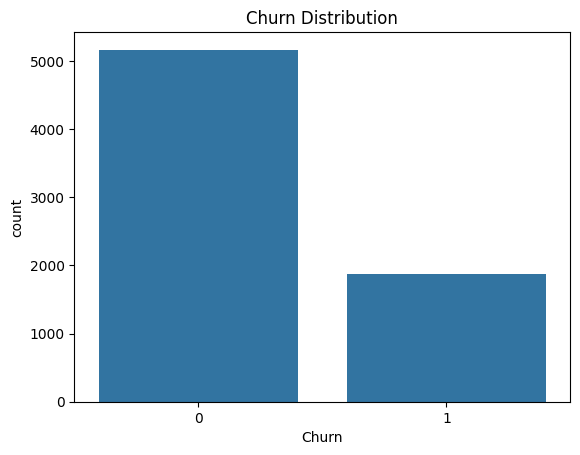

In [4]:
#Class distribution of target variable
print("Class distribution of target variable 'Churn':", df['Churn'].value_counts(),"\n")
print("Percentage of churned customers:", df['Churn'].value_counts(normalize=True).map(lambda x: f"{x:.2%}"),"\n")

#Summary statistics
print("Summary statistics of numerical columns:\n", df.describe())
print("Summary statistics of categorical columns:\n", df.describe(include=['object']))

#Visualize class imbalance
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()
plt.close()

Let's check how churn varies by categorical columns.

Categorical columns: ['customerID', 'gender', 'InternetService', 'Contract', 'PaymentMethod', 'tenure_group'] 



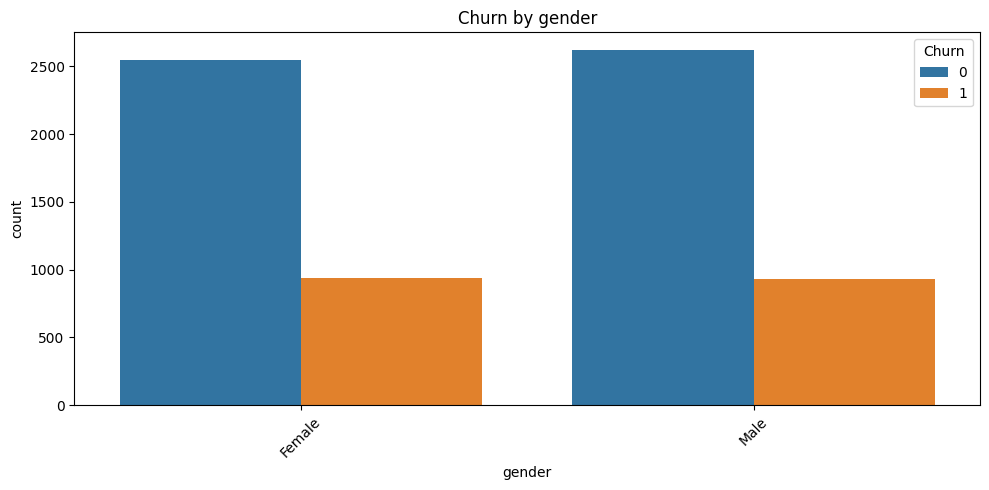

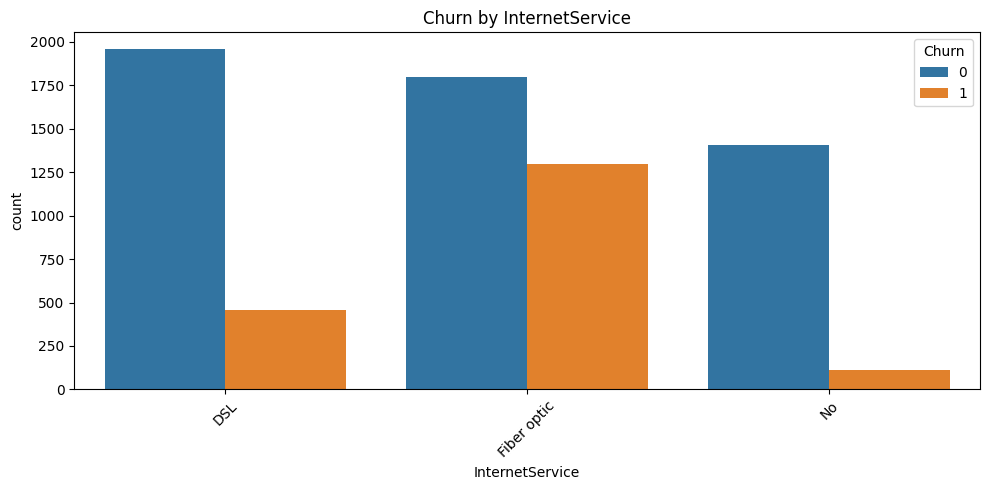

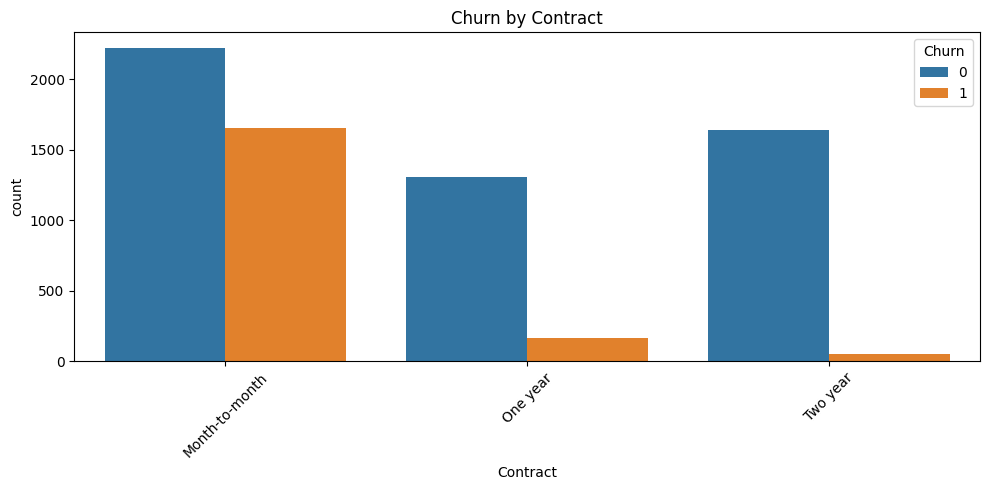

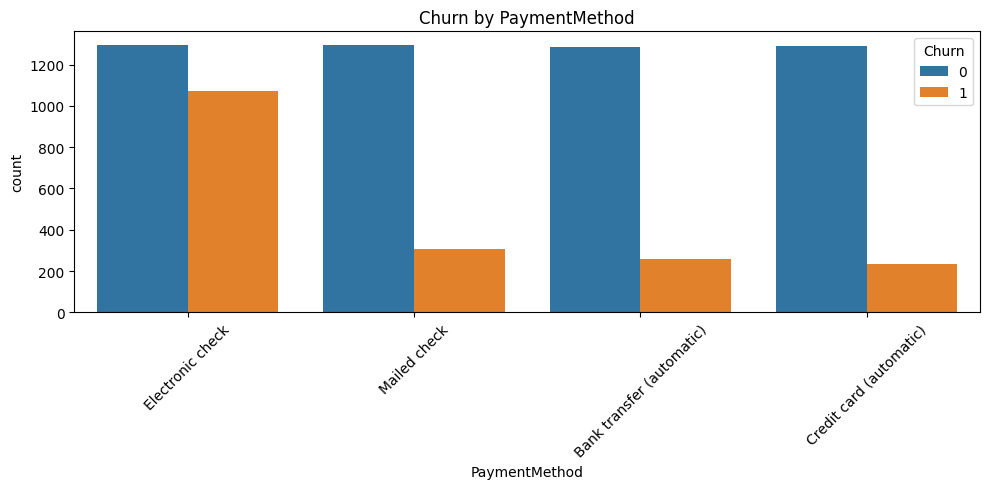

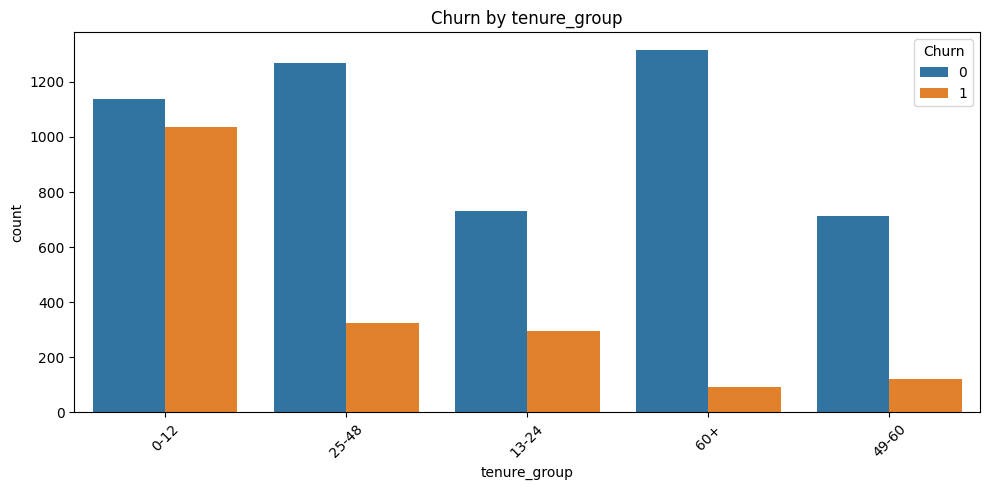

"\nChurn by category explanation.\nFor each categorical column, we create a count plot that shows the distribution of churned and non-churned customers.\nThe x-axis represents the categories of the column, while the y-axis shows the count of customers in each category.\nThe hue parameter is set to 'Churn', which allows us to see how churn varies across different categories.\nThis helps us identify which categories have a higher proportion of churned customers, providing insights into customer \nbehavior and potential factors contributing to churn.\n\nplt.xticks(rotation=45) is used to rotate the x-axis labels for better readability, especially if the category names are long.\nplt.tight_layout() ensures that the plot elements fit well within the figure area, preventing overlap.\n"

In [5]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols,"\n")

"""
As it is a categorical variable, we will display the distribution of churn by categorical columns.
For numeric columns, it is more common to use boxplots or violin plotsto visualize the distribution 
of churn across different numeric values.
"""

# Churn by category
with PdfPages("../reports/report_categorical.pdf") as pdf:
    for col in categorical_cols:
        if col != 'customerID':
            plt.figure(figsize=(10,5))
            sns.countplot(x=col, hue='Churn', data=df)
            plt.title(f'Churn by {col}')
            plt.xticks(rotation=45) 
            plt.tight_layout()
            pdf.savefig(plt.gcf())  # Save each plot to a PDF file
            plt.show()
            plt.close()

"""
Churn by category explanation.
For each categorical column, we create a count plot that shows the distribution of churned and non-churned customers.
The x-axis represents the categories of the column, while the y-axis shows the count of customers in each category.
The hue parameter is set to 'Churn', which allows us to see how churn varies across different categories.
This helps us identify which categories have a higher proportion of churned customers, providing insights into customer 
behavior and potential factors contributing to churn.

plt.xticks(rotation=45) is used to rotate the x-axis labels for better readability, especially if the category names are long.
plt.tight_layout() ensures that the plot elements fit well within the figure area, preventing overlap.
"""


Now for numeric values, first for boxplots and then for KDEs.

Numerical columns: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn'] 



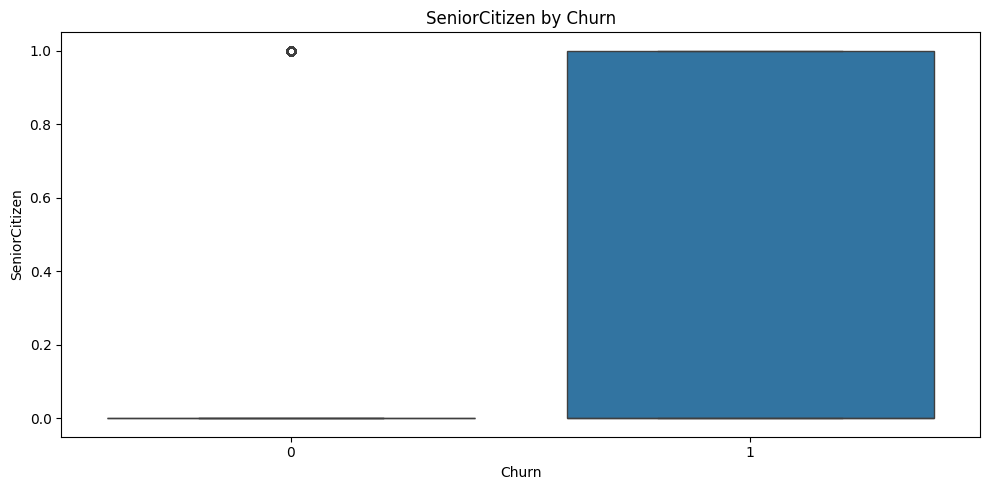

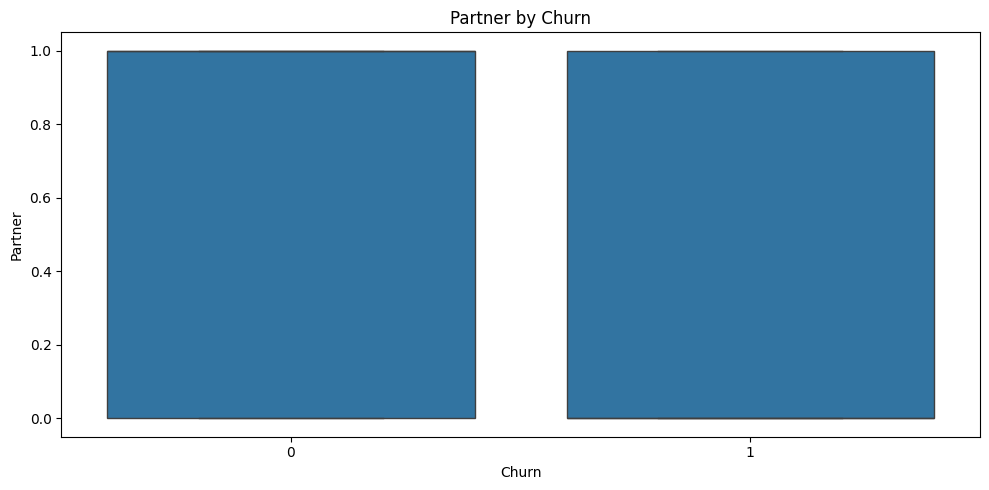

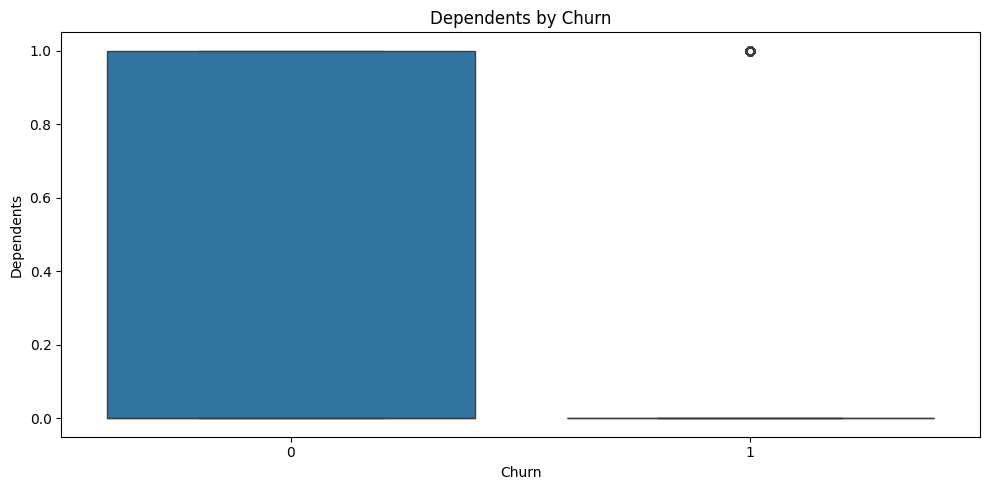

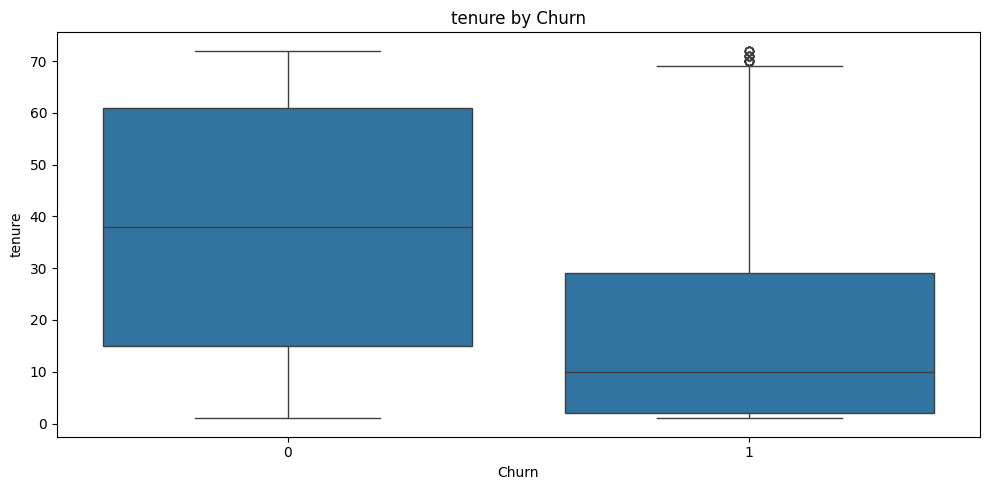

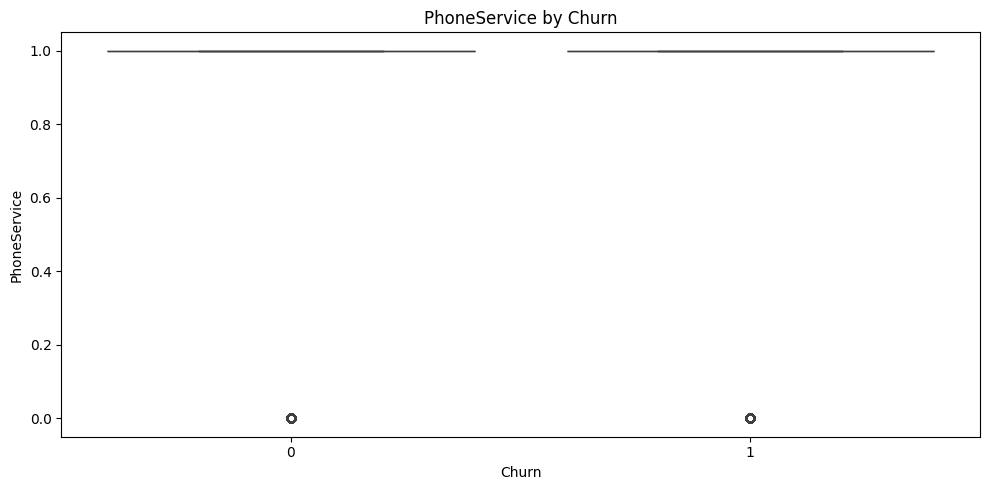

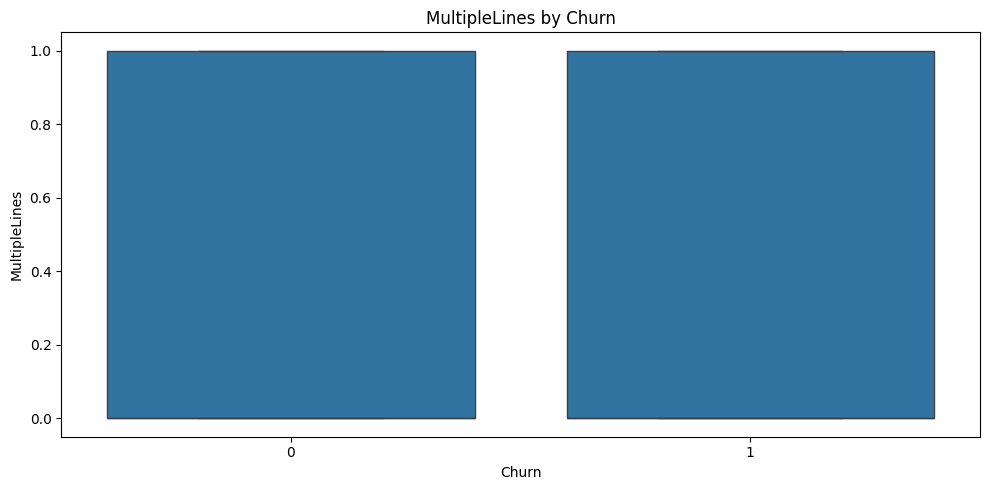

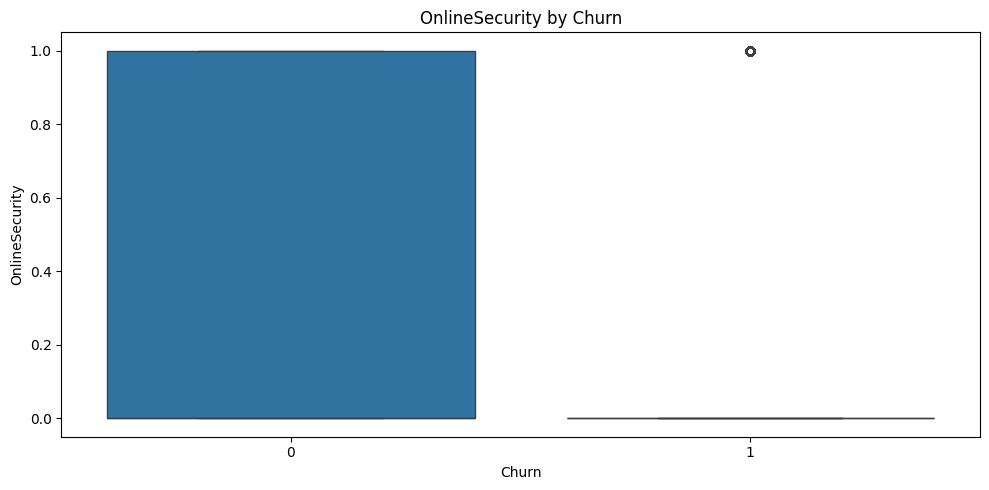

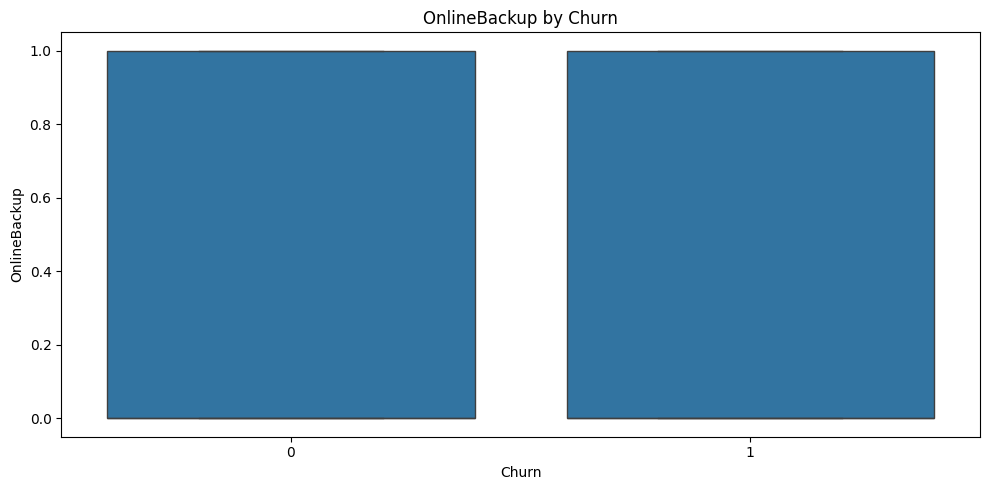

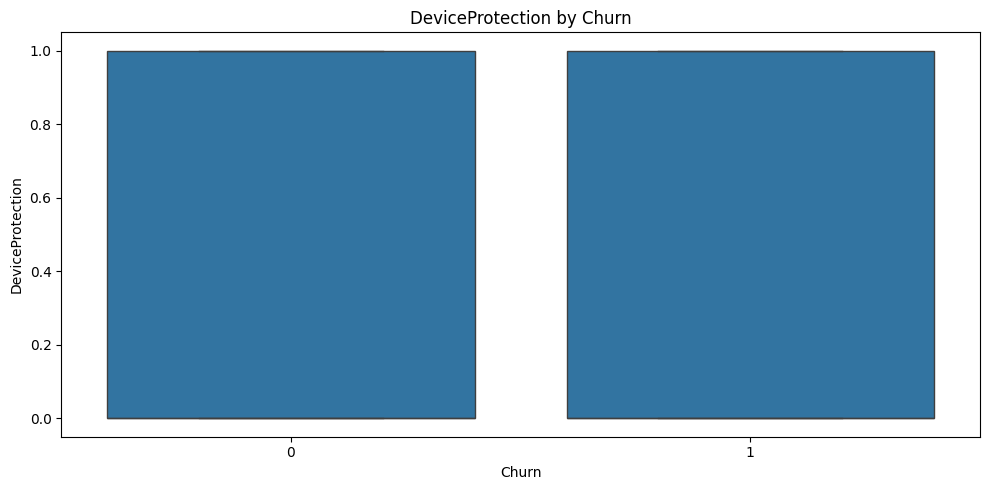

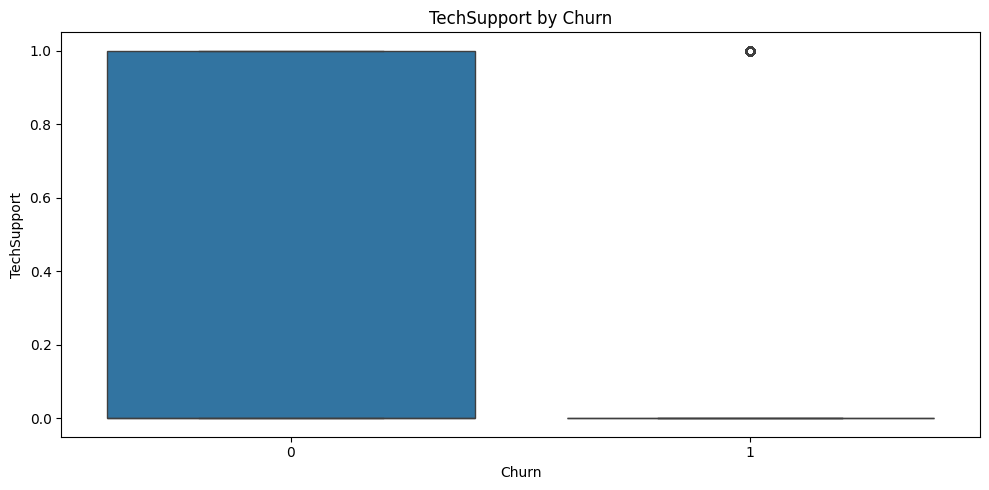

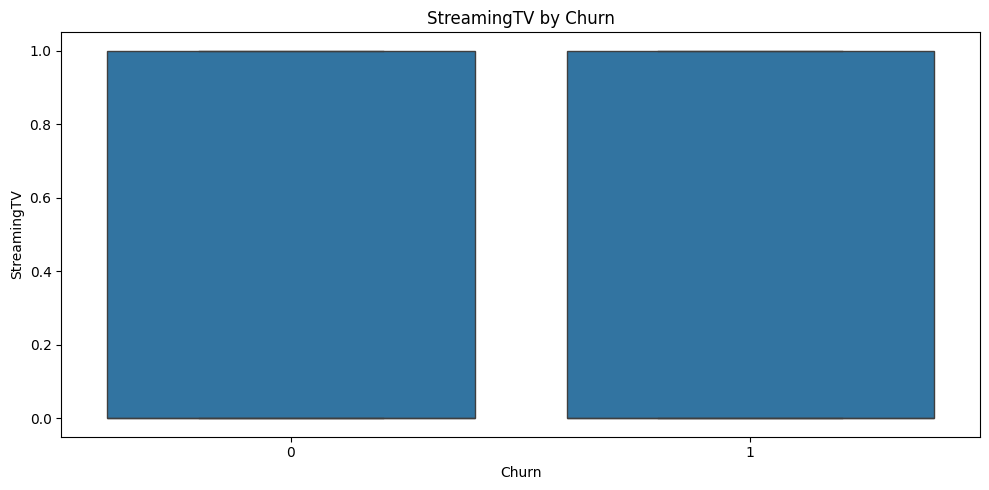

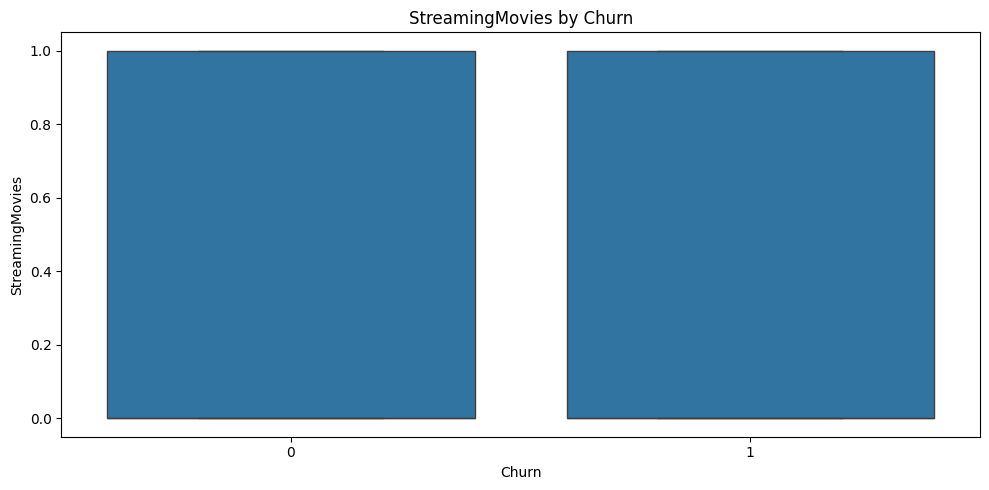

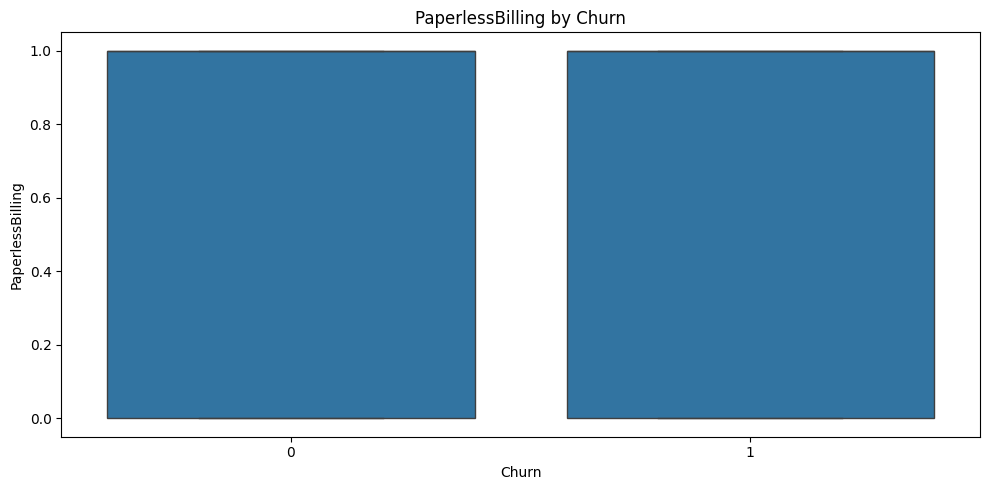

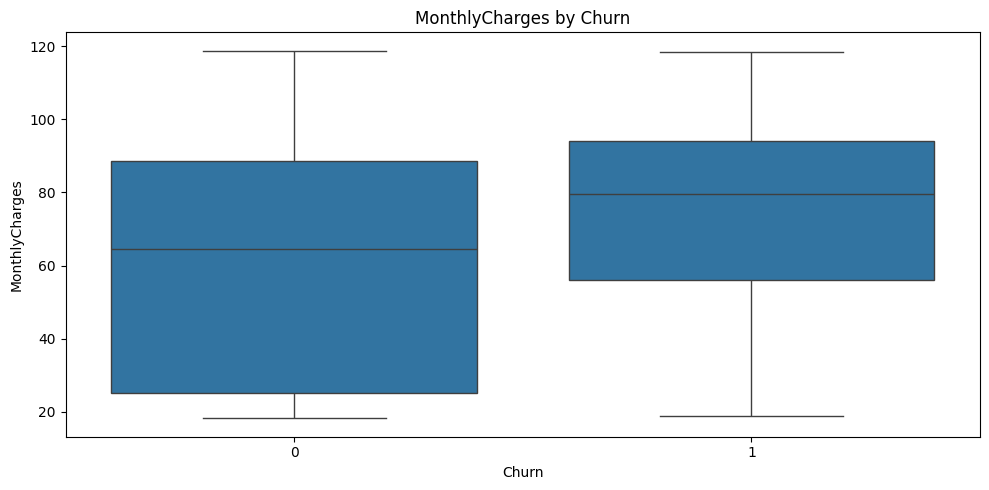

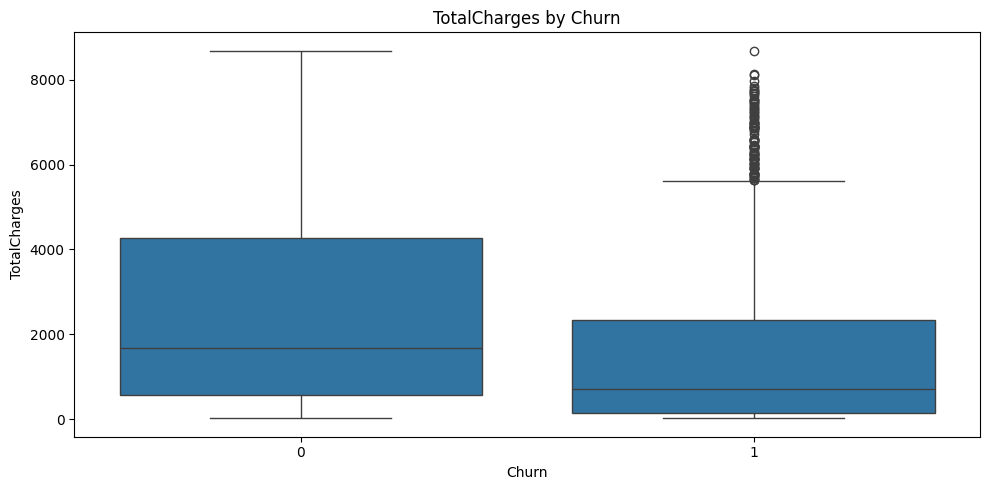

In [6]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical columns:", numerical_cols,"\n")

# Churn by numerical values
with PdfPages("../reports/report_numerical.pdf") as pdf:
    for col in numerical_cols:
        if col != 'Churn':
            plt.figure(figsize=(10,5))
            sns.boxplot(x='Churn', y=col, data=df)
            plt.title(f'{col} by Churn')
            plt.tight_layout()
            pdf.savefig(plt.gcf())
            plt.show()
            plt.close()

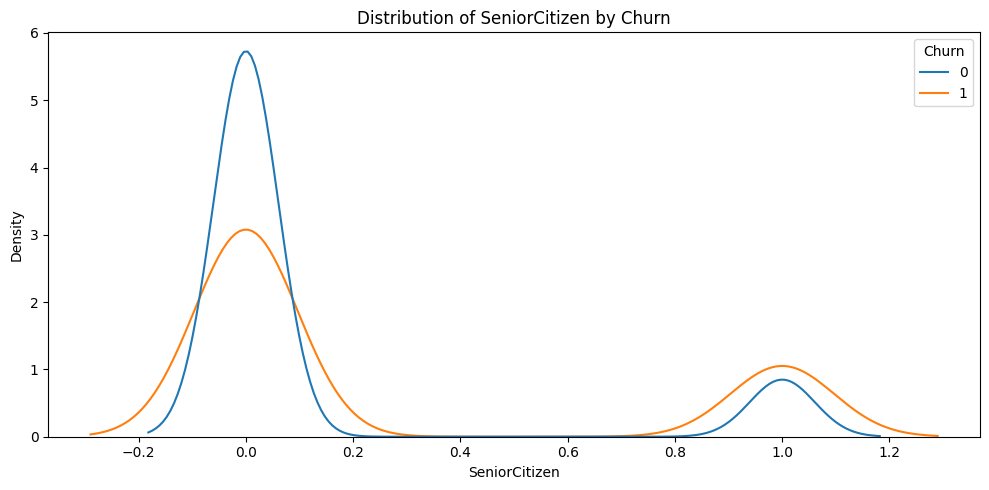

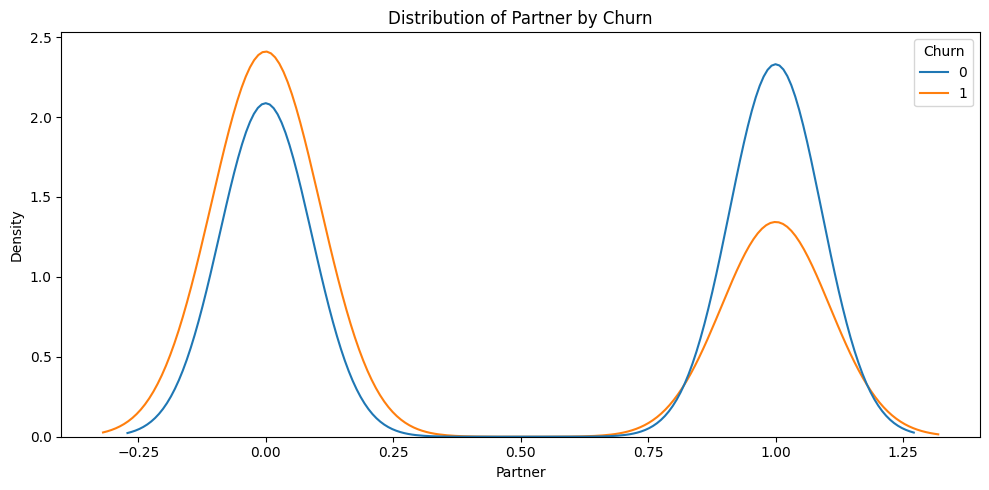

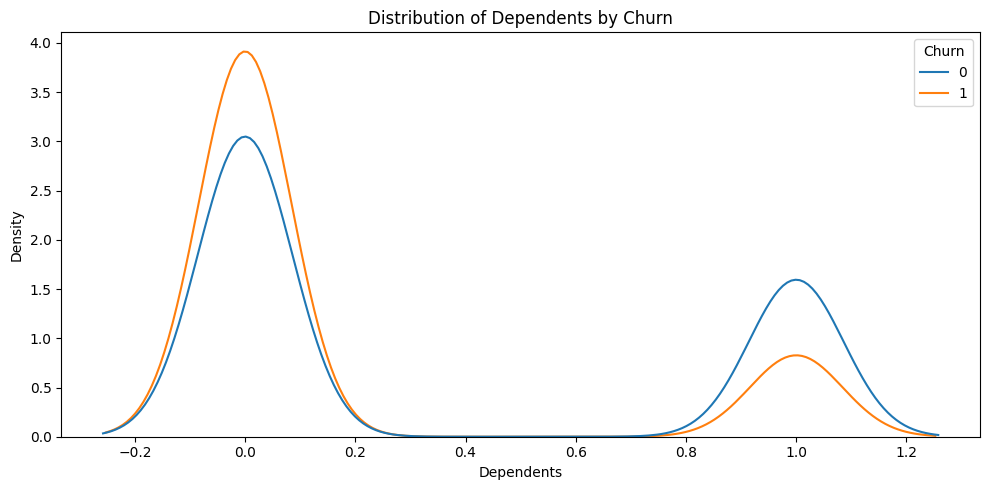

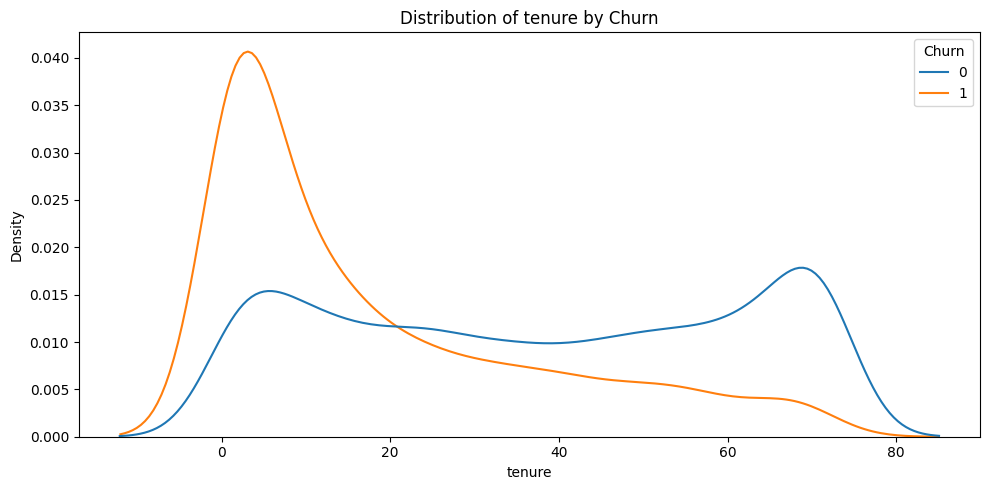

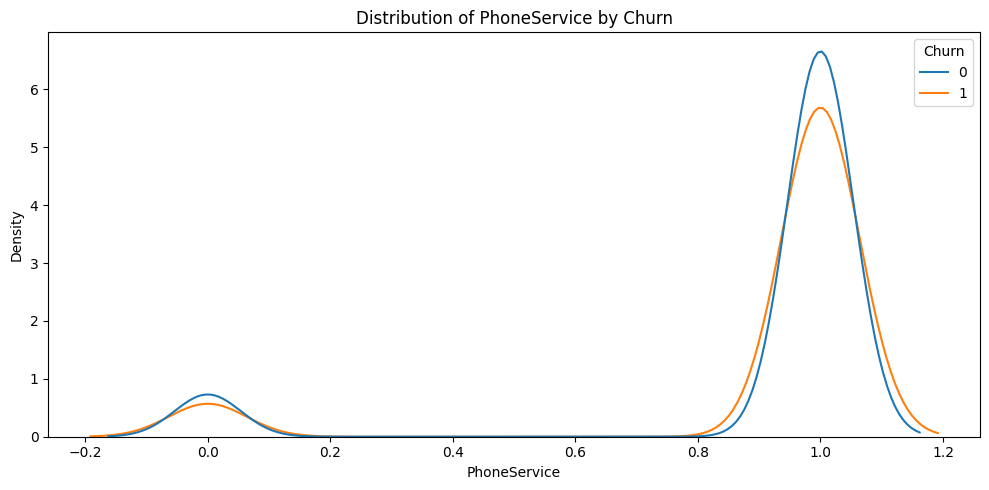

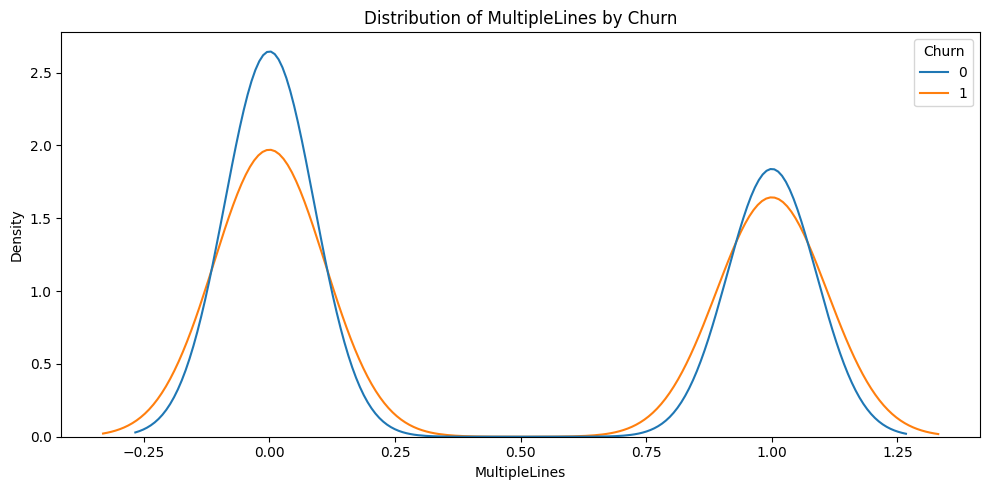

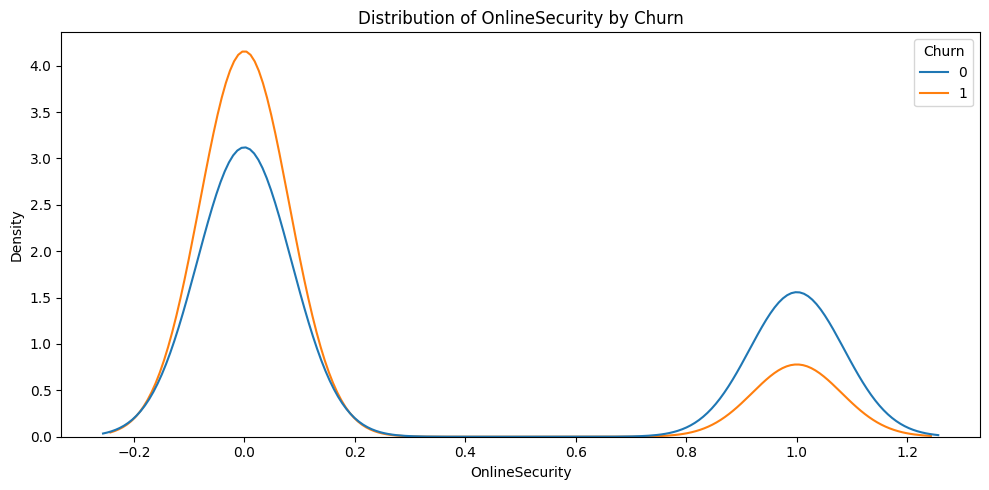

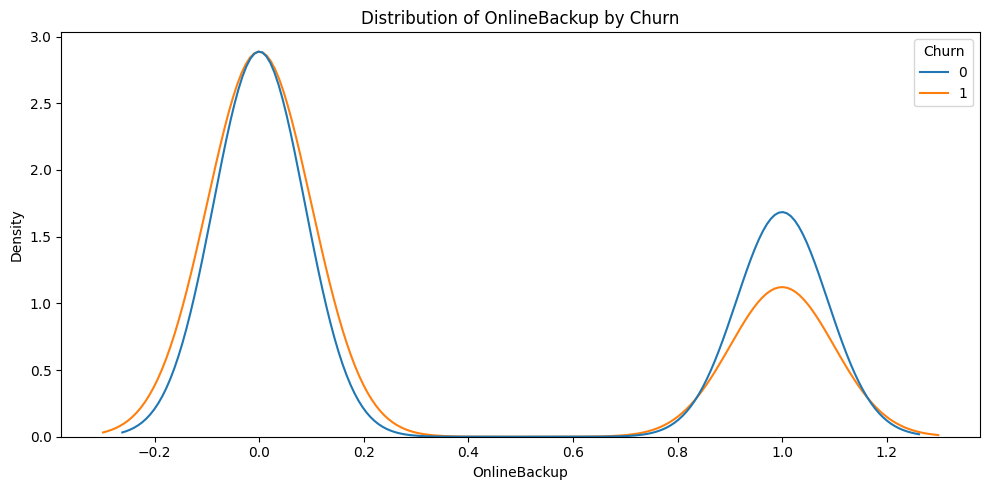

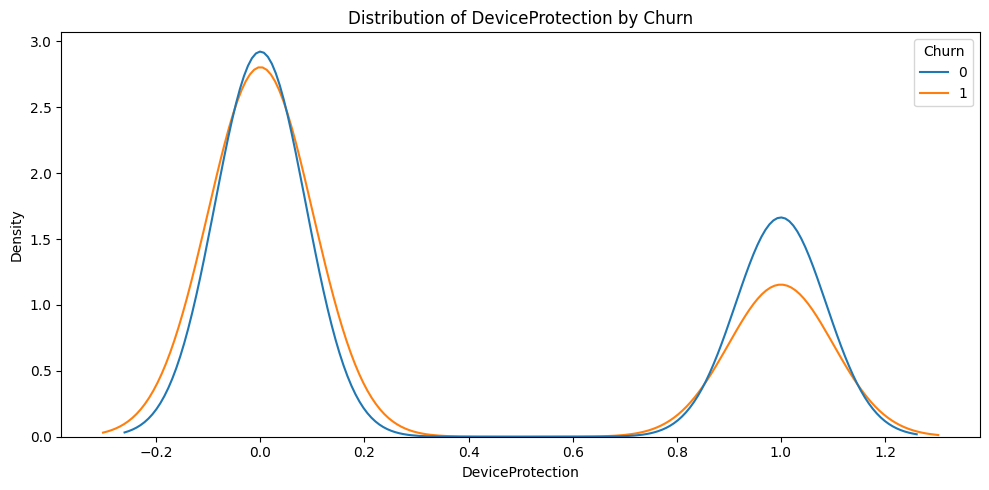

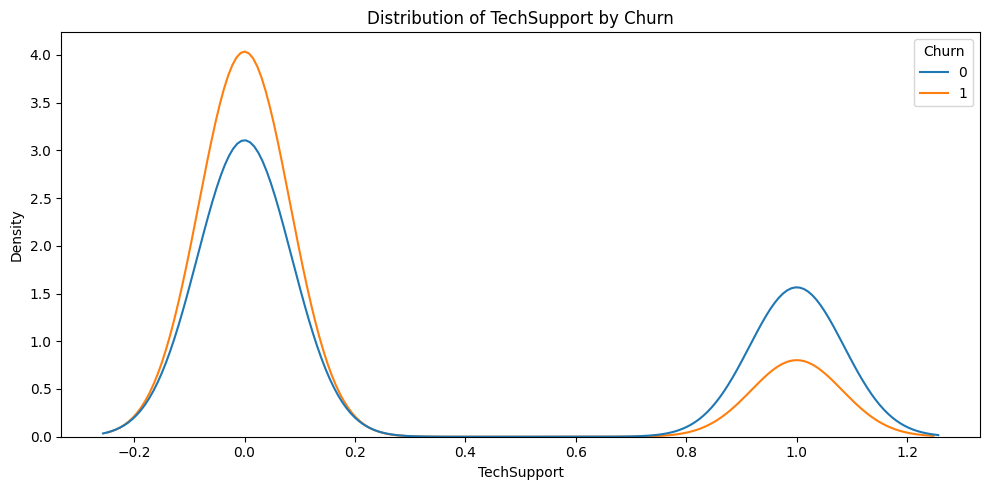

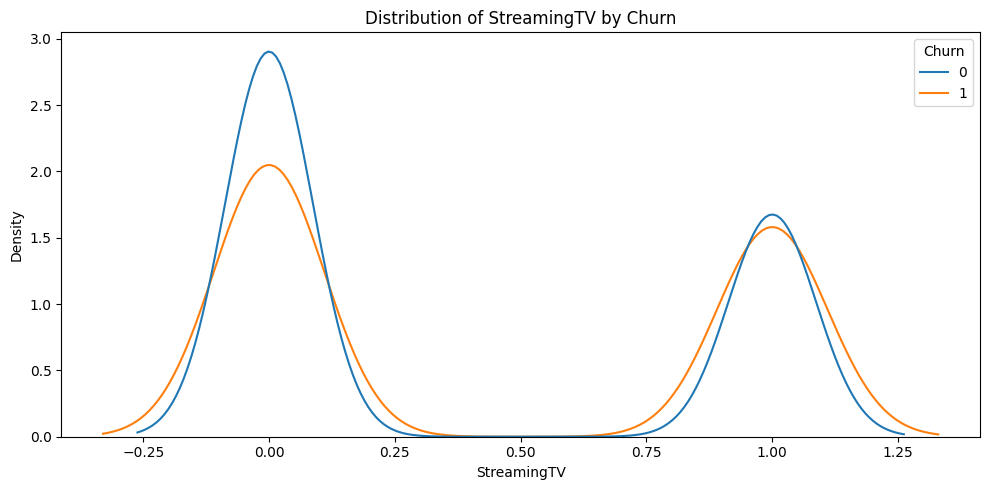

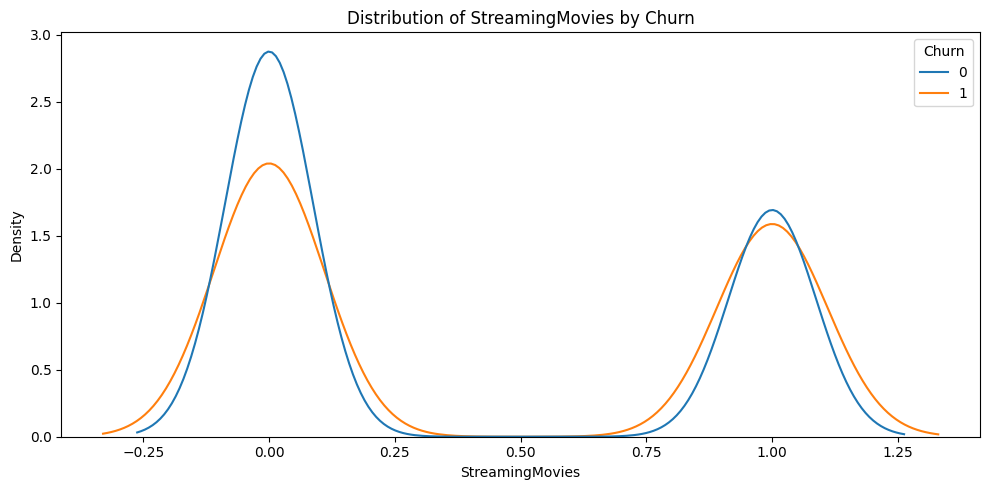

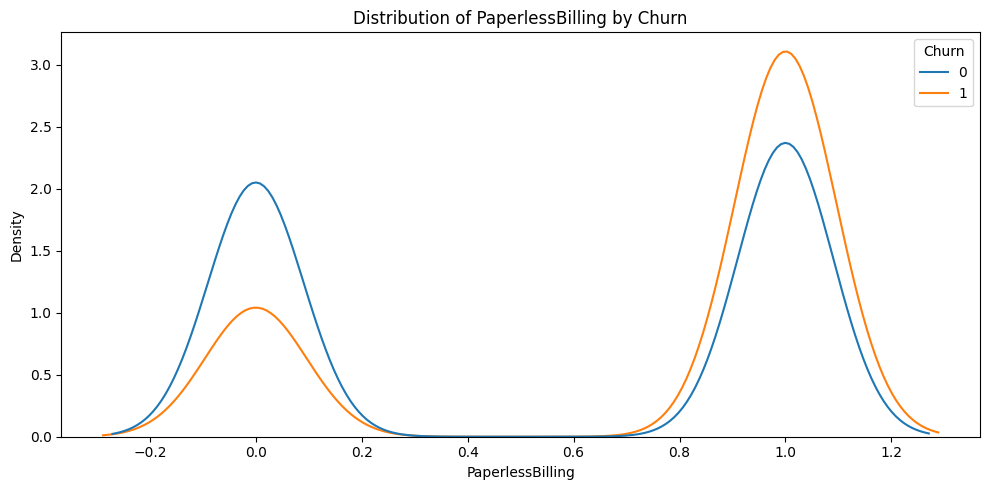

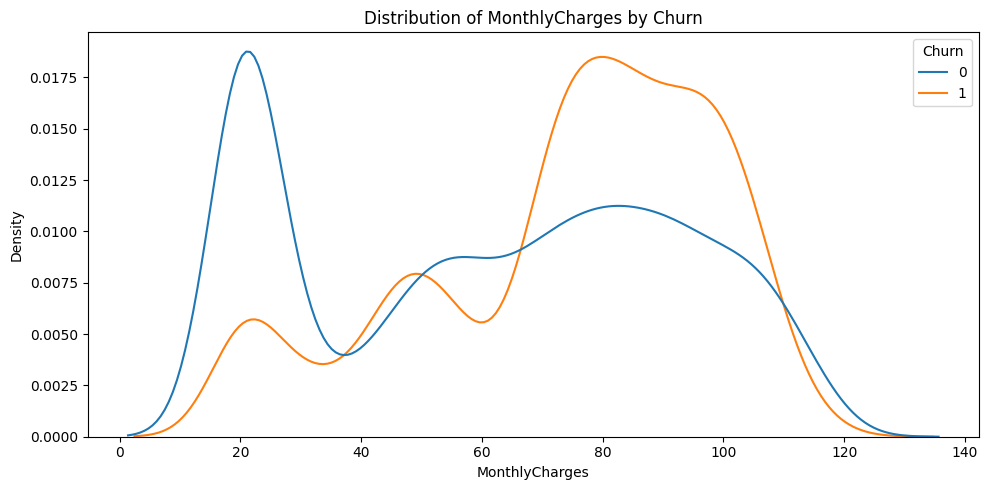

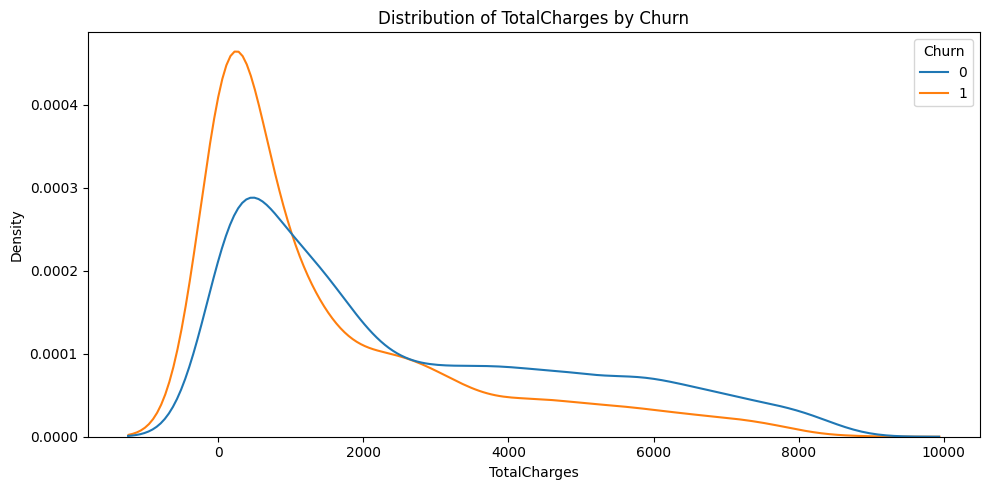

In [7]:
with PdfPages("../reports/report_numerical_kde.pdf") as pdf:
    for col in numerical_cols:
        if col != 'Churn':
            plt.figure(figsize=(10,5))
            sns.kdeplot(hue='Churn', x=col, data=df, common_norm=False)
            plt.title(f'Distribution of {col} by Churn')
            plt.tight_layout()
            pdf.savefig(plt.gcf())
            plt.show()
            plt.close()

Now, we build correlation heatmap to understand what variables are positively strong, hence, understand how much they impact on customer churn.

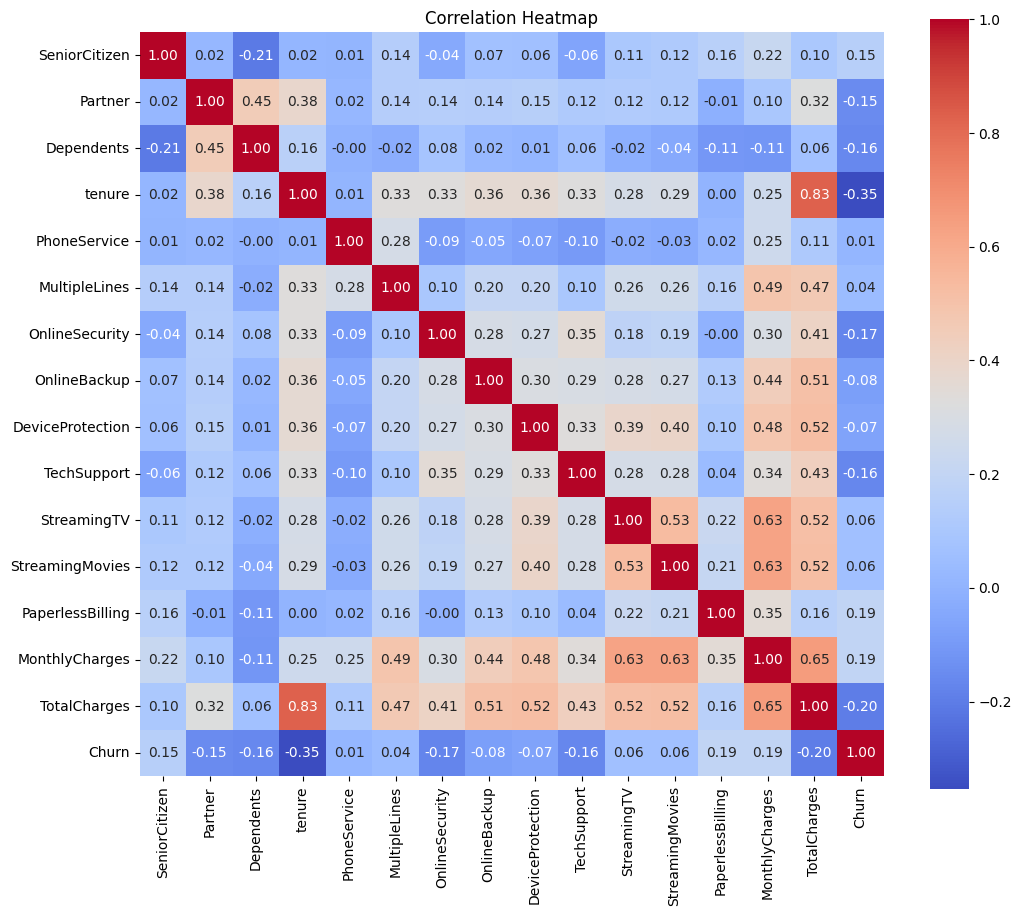

In [8]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
with PdfPages("../reports/report_heatmap.pdf") as pdf:
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Correlation Heatmap')
    pdf.savefig(plt.gcf())
    plt.show()
    plt.close()

In [23]:
# We check again for missing values, just to be sure.
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_group        0
dtype: int64
